## Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

1).

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
a = np.mean(y) - b * np.mean(x)
a, b

(444.1773573243596, 2.620538882402765)

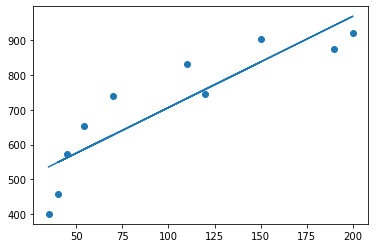

In [3]:
plt.scatter(x,y)
plt.plot(x, a + b*x)
plt.show()

2).

In [4]:
x_ = x.reshape((len(x),1))
y_ = y.reshape((len(y), 1))
x_ = np.hstack([np.ones((len(x_),1)),x_])
x_

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [5]:
c = np.dot(np.linalg.inv(np.dot(x_.T, x_)), x_.T@y_)
c.reshape(1,len(c))

array([[444.17735732,   2.62053888]])

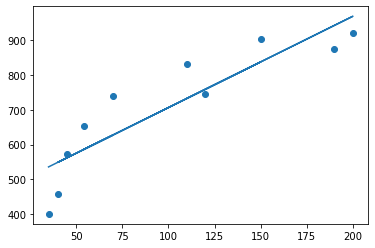

In [6]:
plt.scatter(x,y)
plt.plot(x, c[0,0] + c[1,0]*x)
plt.show()

### Задача 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [7]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(ks)
alpha = 1e-6
B1 = 0.1

def mse_(B1, y=ks, X=zp, n=len(ks)):
    return np.sum((B1 * X - y)**2) / n

for i in range(1000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i % 100 == 0:
        print(f'iteration: {i}, B1: {B1},\tmse: {mse_(B1)}')

iteration: 0, B1: 0.25952808,	mse: 493237.7212546963
iteration: 100, B1: 5.54537842245223,	mse: 58151.31823171113
iteration: 200, B1: 5.868748638669329,	mse: 56522.97550129376
iteration: 300, B1: 5.888531320728348,	mse: 56516.88130936019
iteration: 400, B1: 5.8897415574471985,	mse: 56516.85850140053
iteration: 500, B1: 5.889815595583751,	mse: 56516.858416040064
iteration: 600, B1: 5.889820124983314,	mse: 56516.85841572062
iteration: 700, B1: 5.889820402076462,	mse: 56516.85841571941
iteration: 800, B1: 5.88982041902807,	mse: 56516.8584157194
iteration: 900, B1: 5.889820420065112,	mse: 56516.85841571941


In [8]:
for i in range(3000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%500==0:
        print(f'iteration: {i}, B1: {B1},\tmse: {mse_(B1)}')

iteration: 0, B1: 5.8898204201285544,	mse: 56516.85841571941
iteration: 500, B1: 5.889820420132673,	mse: 56516.85841571943
iteration: 1000, B1: 5.889820420132673,	mse: 56516.85841571943
iteration: 1500, B1: 5.889820420132673,	mse: 56516.85841571943
iteration: 2000, B1: 5.889820420132673,	mse: 56516.85841571943
iteration: 2500, B1: 5.889820420132673,	mse: 56516.85841571943


In [9]:
mse_(5.88982042)

56516.85841571943

### Задача 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [10]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

zp = np.vstack([np.ones(len(zp)),zp])
n = len(ks)
alpha = 1e-6
B = np.array([1, 0.5])

 
for i in range(3000):
  gf = np.dot(B, zp)
  B -= alpha*(2/n)*np.dot((gf-ks), zp.T)
  if i % 500 == 0:
    print(f'iteration: {i},   \tB: {B}')

iteration: 0,   	B: [1.0013164 0.648304 ]
iteration: 500,   	B: [1.15222848 5.88139522]
iteration: 1000,   	B: [1.26458813 5.88057269]
iteration: 1500,   	B: [1.37691925 5.87974588]
iteration: 2000,   	B: [1.48922189 5.87891928]
iteration: 2500,   	B: [1.60149604 5.8780929 ]
